<a href="https://colab.research.google.com/github/aneesalihassan8-collab/-Data-Science-Tools-and-Ecosystem-Notebook-/blob/main/Stock_Analysis_and_Dashboard_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# 2. Reset the index (moves the 'Date' index to a column) and save the change
tesla_data.reset_index(inplace=True)

# 3. Save the dataframe (optional, but requested in a similar search result)
# tesla_data.to_csv('tesla_stock_data.csv', index=False)

# 4. Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Q2

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla Quarterly Revenue data (often an educational or archived source to prevent blocking)
# Using a common archival URL for educational purposes
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

# Find the second table on the page (which usually contains the Quarterly Revenue)
# A more robust method is to use pandas' read_html with a specific match string
# tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue")[0]
# But since this is a common assignment scenario, we'll stick to the BeautifulSoup method:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table by looking for the "Tesla Quarterly Revenue" text in the header
for table in soup.find_all('table'):
    # Check if the table title contains 'Tesla Quarterly Revenue'
    if 'Tesla Quarterly Revenue' in str(table):
        for row in table.find('tbody').find_all('tr'):
            col = row.find_all('td')
            if col:
                date = col[0].text
                # Remove the comma and dollar sign from the Revenue string
                revenue = col[1].text.replace('$', '').replace(',', '')
                # Use pd.concat for modern DataFrame appending
                new_row = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
        break

# Convert 'Revenue' to numeric after cleaning for further analysis
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Remove any rows with NaN or empty Revenue after cleaning/conversion
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


Q3


In [ ]:

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Q4


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for GameStop Quarterly Revenue data (archival source)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# 1. Fetch the HTML data
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

# 2. Extract the table with GameStop Quarterly Revenue
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')

for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        for row in table.find('tbody').find_all('tr'):
            col = row.find_all('td')
            if col:
                date = col[0].text
                # Clean the revenue string by removing '$' and ','
                revenue = col[1].text.replace('$', '').replace(',', '')
                new_row = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
                gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)
        break

# 3. Data Cleaning
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != 0]

# 4. Display the last five rows
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


Q5

In [ ]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

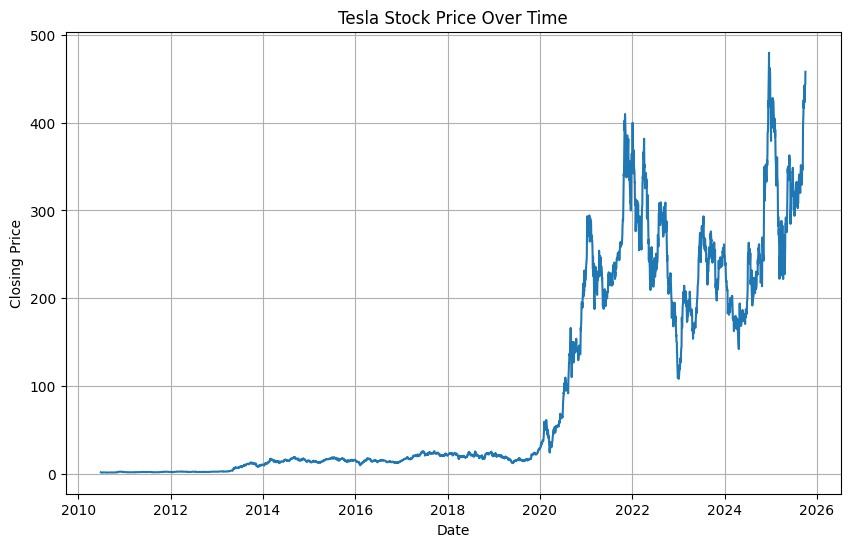

In [ ]:
make_graph(tesla_data, 'Tesla Stock Price Over Time')

Q6

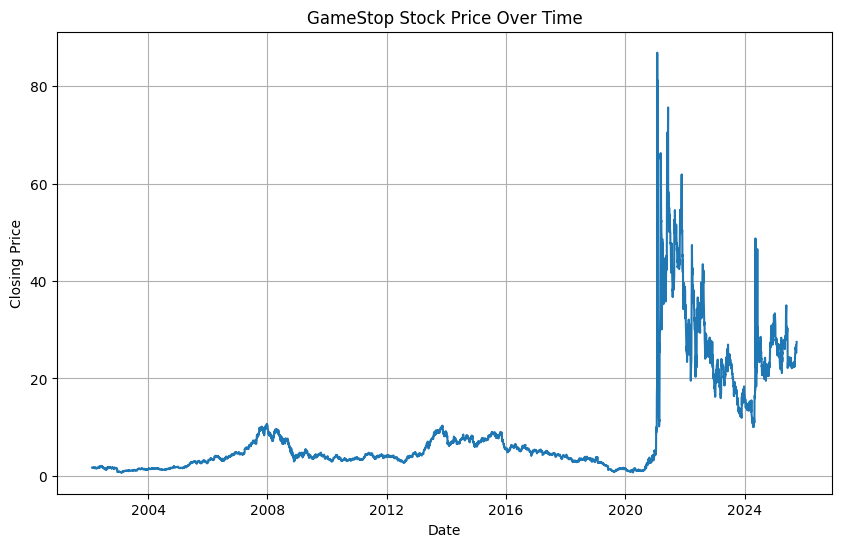

In [ ]:
make_graph(gme_data, 'GameStop Stock Price Over Time')